In [8]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

In [2]:
from sklearn import linear_model

ModuleNotFoundError: No module named 'sklearn'

In [3]:
from sklearn import linear_model

In [4]:
pwd

'/Users/tsubasa/Jupyter/20190916_toudai'

In [9]:
import requests, zipfile
from io import StringIO
import io

In [15]:
cd /Users/tsubasa/Jupyter/20190916_toudai/chap3

/Users/tsubasa/Jupyter/20190916_toudai/chap3


In [16]:
student_data_math = pd.read_csv('student-mat.csv')

In [18]:
student_data_math.head(10)

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
5,"GP;""M"";16;""U"";""LE3"";""T"";4;3;""services"";""other""..."
6,"GP;""M"";16;""U"";""LE3"";""T"";2;2;""other"";""other"";""h..."
7,"GP;""F"";17;""U"";""GT3"";""A"";4;4;""other"";""teacher"";..."
8,"GP;""M"";15;""U"";""LE3"";""A"";3;2;""services"";""other""..."
9,"GP;""M"";15;""U"";""GT3"";""T"";3;4;""other"";""other"";""h..."


In [19]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [20]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
?pd.read_csv

In [22]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [23]:
student_data_math.sex.head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [24]:
student_data_math.paid.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: paid, dtype: object

In [25]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [26]:
student_data_math.absences.head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [27]:
student_data_math.groupby('sex').age.mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

# 3-3 Descriptive Statistics

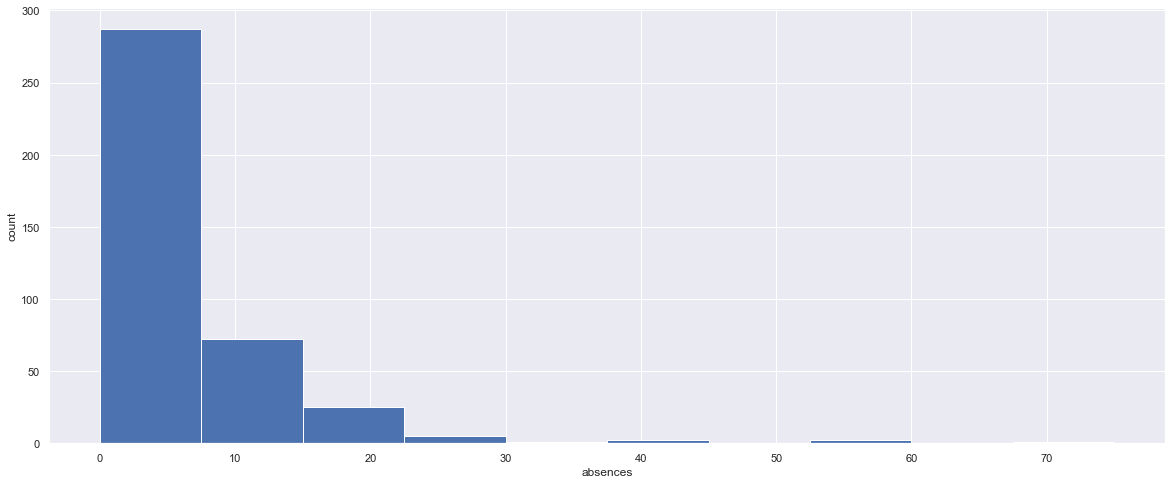

In [30]:
plt.figure(figsize=(20, 8))

plt.hist(student_data_math.absences)

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [31]:
print('mean : ', student_data_math.absences.mean())
print('median : ', student_data_math.absences.median())
print('mode : ', student_data_math.absences.mode())

mean :  5.708860759493671
median :  4.0
mode :  0    0
dtype: int64


In [32]:
student_data_math.absences.var()

64.04954057700957

In [33]:
student_data_math.absences.std()

8.00309568710818

In [34]:
student_data_math.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [37]:
student_data_math.absences.describe()[6] - student_data_math.absences.describe()[4]

8.0

In [38]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [46]:
student_data_math[['age', 'Medu']].describe()

,age,Medu
count,395.000000,395.000000
mean,16.696203,2.749367
std,1.276043,1.094735
min,15.000000,0.000000
25%,16.000000,2.000000
50%,17.000000,3.000000
75%,18.000000,4.000000
max,22.000000,4.000000


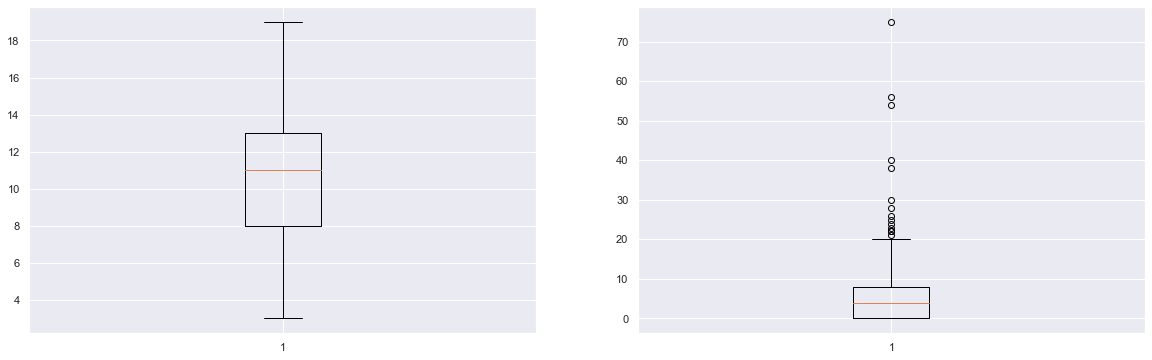

In [53]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.boxplot(student_data_math['G1'])

plt.subplot(1, 2, 2)
plt.boxplot(student_data_math['absences'])

plt.grid(True)

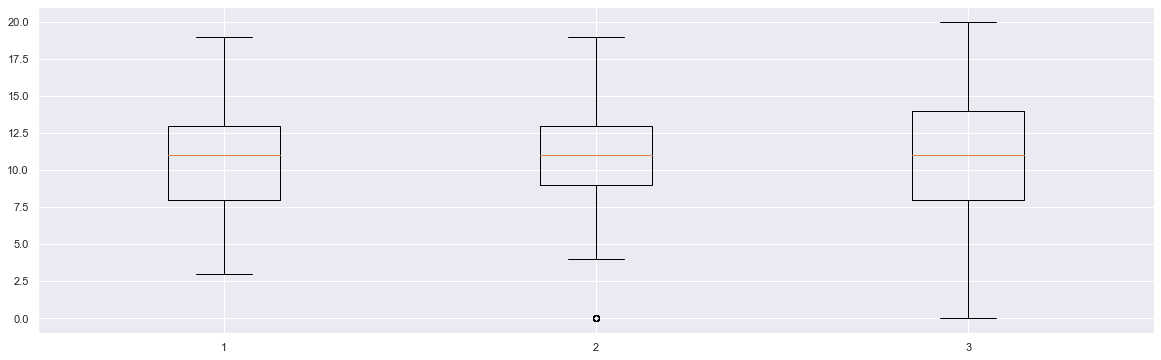

In [55]:
plt.figure(figsize=(20, 6))
plt.boxplot([student_data_math.G1, student_data_math.G2, student_data_math.G3])
plt.grid(True)

In [56]:
student_data_math.absences.std() / student_data_math.absences.mean()

1.4018726369879073

In [57]:
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

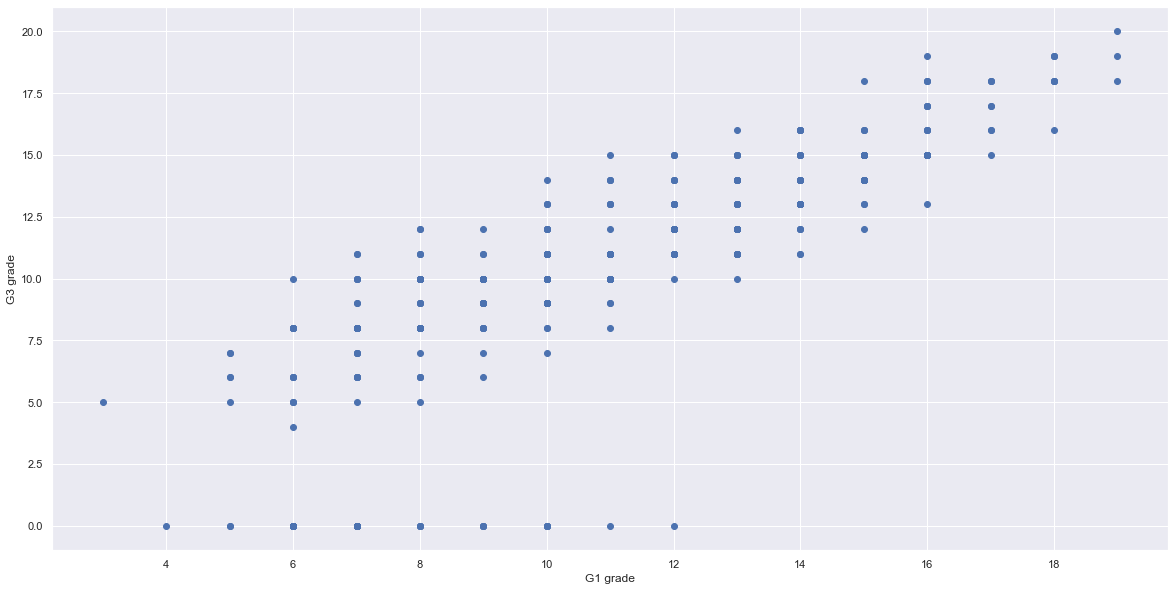

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(student_data_math.G1, student_data_math.G3, 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [60]:
np.cov(student_data_math.G1, student_data_math.G3)

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [61]:
print('G1 var : ', student_data_math.G1.var())
print('G3 var : ', student_data_math.G3.var())

G1 var :  11.017053267364904
G3 var :  20.989616397866733


In [62]:
sp.stats.pearsonr(student_data_math.G1, student_data_math.G3)

(0.8014679320174141, 9.001430312276602e-90)

In [63]:
np.corrcoef(student_data_math.G1, student_data_math.G3)

array([[1.   , 0.801],
       [0.801, 1.   ]])

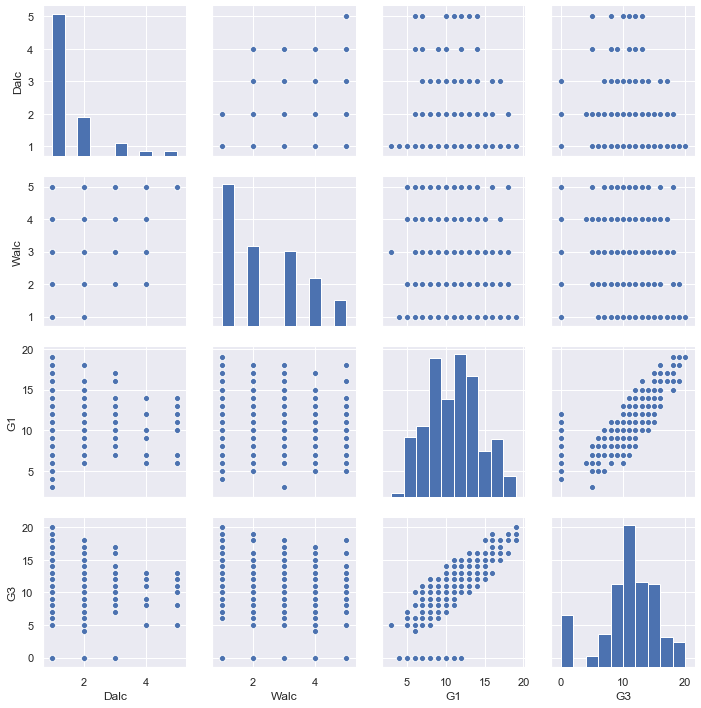

In [64]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [86]:
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [96]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [124]:
student_data_por.index.

AttributeError: 'RangeIndex' object has no attribute 'head'

In [134]:
merged_data = pd.merge(student_data_math, 
                       student_data_por, 
                       on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'],
                       suffixes=('_math', '_por'))

In [135]:
merged_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [136]:
merged_data = merged_data.dropna()

In [137]:
merged_data.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


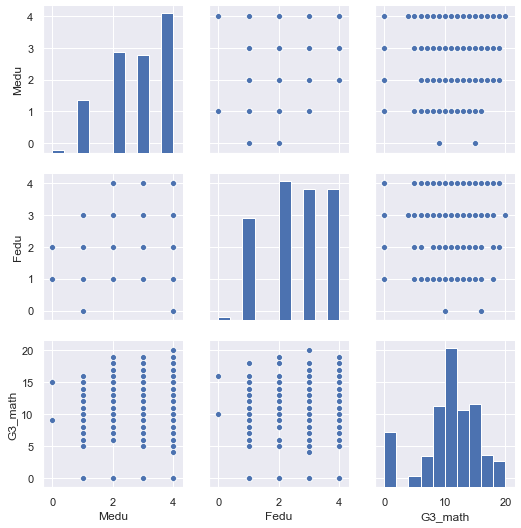

In [138]:
sns.pairplot(merged_data[['Medu', 'Fedu', 'G3_math']])

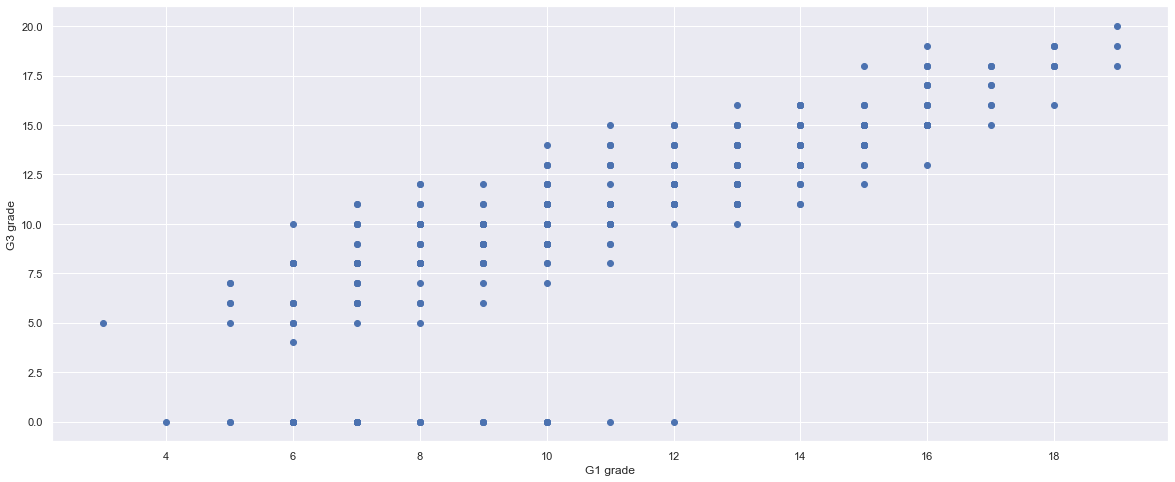

In [141]:
plt.figure(figsize=(20, 8))
plt.plot(student_data_math.G1, student_data_math.G3, 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [142]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [158]:
X = student_data_math.loc[:, ['G1']].values
Y = student_data_math.loc[:, ['G3']].values
reg.fit(X, Y)
print('regression coefficient : ', reg.coef_[0][0])
print('intercept : ', reg.intercept_[0])

regression coefficient :  1.1062560947728437
intercept :  -1.6528038288004634


In [146]:
reg.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([[1.106]]),
 '_residues': array([2957.726]),
 'rank_': 1,
 'singular_': array([65.884]),
 'intercept_': array([-1.653])}

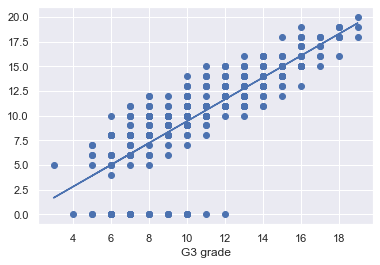

In [150]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.xlabel('G3 grade')
plt.plot(X, reg.predict(X))
plt.grid(True)

In [151]:
type(student_data_math.G1)

pandas.core.series.Series

In [152]:
print('coefficient of determination : ', reg.score(X, Y))

coefficient of determination :  0.6423508460522701


In [154]:
reg.__module__

'sklearn.linear_model.base'

In [155]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [159]:
X = student_data_por.loc[:, ['G1']].values
Y = student_data_por.loc[:, ['G3']].values
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
print('regression coefficient : ', reg.coef_)
print('intercept : ', reg.intercept_)
print('coefficient of determination : ', reg.score(X, Y))

regression coefficient :  [[0.973]]
intercept :  [0.82]
coefficient of determination :  0.6829156800171085


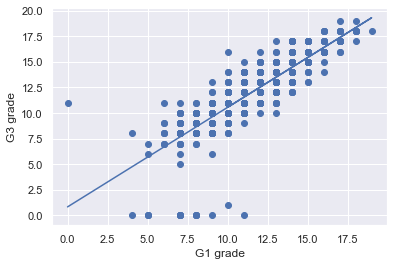

In [162]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.plot(X, reg.predict(X))
plt.grid(True)

In [163]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [164]:
X = student_data_por.loc[:, ['absences']].values
Y = student_data_por.loc[:, ['G3']].values
reg.fit(X, Y)
print('regression coefficient : ', reg.coef_)
print('intercept : ', reg.intercept_)
print('coefficinet of determination : ', reg.score(X, Y))

regression coefficient :  [[-0.064]]
intercept :  [12.139]
coefficinet of determination :  0.008350131955637385


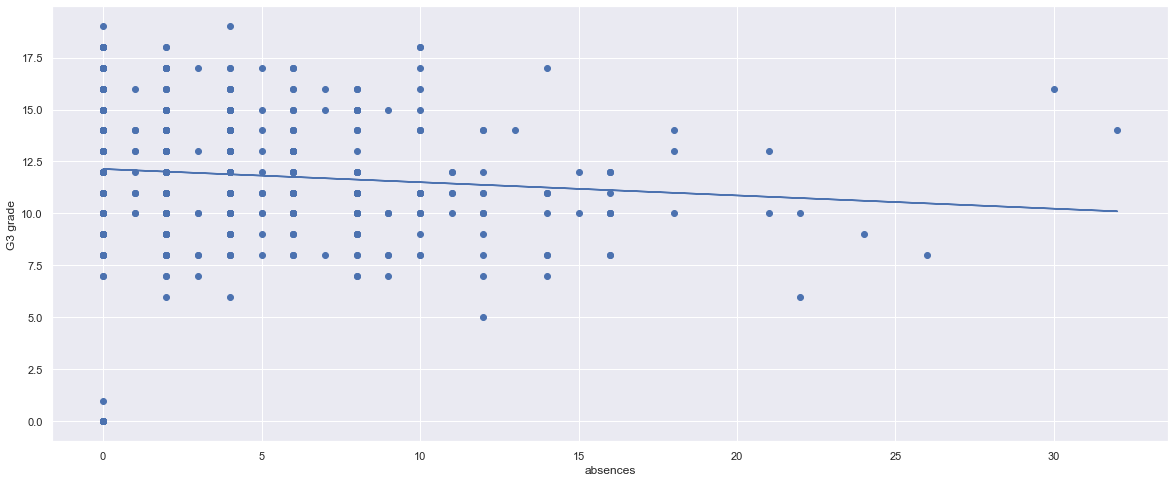

In [165]:
plt.figure(figsize=(20, 8))
plt.scatter(X, Y)
plt.xlabel('absences')
plt.ylabel('G3 grade')
plt.plot(X, reg.predict(X))
plt.grid(True)

In [4]:
import pandas as pd

wine_data = pd.read_csv('/Users/tsubasa/Jupyter/20190916_toudai/chap3/winequality-red.csv', sep=';')

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_data.to_csv('/Users/tsubasa/Jupyter/20190916_toudai/chap3/summary_statistics.csv')

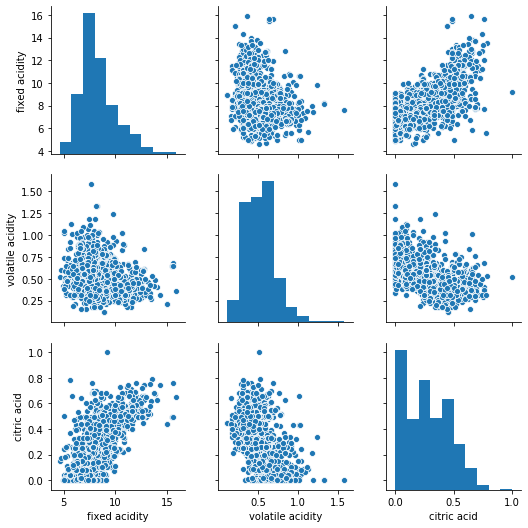

In [11]:
import seaborn as sns

sns.pairplot(wine_data[['fixed acidity', 'volatile acidity', 'citric acid']])

In [13]:
import pandas as pd

student_data_math = pd.read_csv('/Users/tsubasa/Jupyter/20190916_toudai/chap3/student-mat.csv', sep=';')

In [22]:
math_m = student_data_math[student_data_math.sex == 'M'].G1.sort_values().cumsum().values
math_f = student_data_math[student_data_math.sex == 'F'].G1.sort_values().cumsum().values

ValueError: x and y must have same first dimension, but have shapes (187,) and (208,)

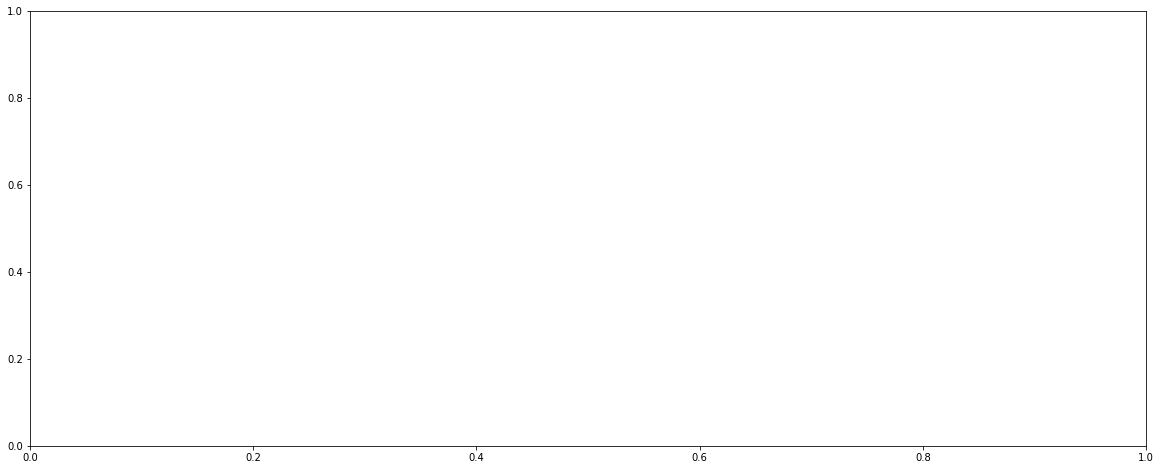

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(math_m, math_f)
plt.xlabel('math_m.cumsum')
plt.ylabel('math_f.cumsum')
plt.grid(True)